In [ ]:
!pip install bioinfokit

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from bioinfokit.analys import stat

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols


**Q:1 Task making cluster of okquakes and injection well and show then on scatter plot**

In [ ]:
#load dataset
df_quakes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/okQuakes.csv')
for_chi = df_quakes
#drop  those colums from dataset which are  not use full for clustering and having many null values
df_quakes = df_quakes.drop(columns=['updated','id','nst','gap','dmin','rms','horizontalError','depthError','magError','magNst'])
df_quakes.head()

,time,latitude,longitude,depth,mag,magType,net,place,type,status,locationSource,magSource
0,1973-03-17T07:43:05.500Z,36.087,-106.168,6.0,4.5,mb,us,New Mexico,earthquake,reviewed,us,us
1,1973-05-25T14:40:13.900Z,33.917,-90.775,6.0,NaN,NaN,us,Mississippi,earthquake,reviewed,s,us
2,1973-09-19T13:28:20.500Z,37.160,-104.594,5.0,NaN,NaN,us,Colorado,earthquake,reviewed,us,us
3,1973-09-23T03:58:54.900Z,37.148,-104.571,5.0,4.2,mb,us,Colorado,earthquake,reviewed,us,us
4,1974-02-15T13:33:49.200Z,36.500,-100.693,24.0,4.5,mb,us,Oklahoma,earthquake,reviewed,us,us


In [ ]:
#replace missing value with null
df_quakes['magType' ] =df_quakes['magType' ].fillna('Null')
#replacing numeric missing value with mean value
mean=df_quakes['mag'].mean()
df_quakes['mag'] =df_quakes['mag' ].fillna(mean)


#convert string data to numeric for clustering
df_quakes['magType']= df_quakes['magType'].astype('category').cat.codes
df_quakes['net']= df_quakes['net'].astype('category').cat.codes
df_quakes['place']= df_quakes['place'].astype('category').cat.codes

df_quakes['type']= df_quakes['type'].astype('category').cat.codes
df_quakes['status']= df_quakes['status'].astype('category').cat.codes
df_quakes['locationSource']= df_quakes['locationSource'].astype('category').cat.codes
df_quakes['magSource']= df_quakes['magSource'].astype('category').cat.codes




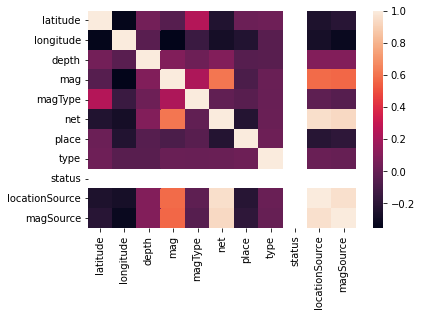

,longitude,latitude
0,-106.168000,36.087000
1,-90.775000,33.917000
2,-104.594000,37.160000
3,-104.571000,37.148000
4,-100.693000,36.500000
...,...,...
13949,-96.818700,36.373500
13950,-96.882400,36.412200
13951,-98.072667,37.277167
13952,-97.896000,36.939300


In [ ]:

coreltion=df_quakes.corr()
map=sns.heatmap(coreltion)
plt.show()
#seprate perfect colmns for clustering
new_df= df_quakes[['longitude', 'latitude']]
new_df

In [ ]:
#Initialize the class object
#from id no my cluter no is 16
kmeans = KMeans(n_clusters= 16)
label=kmeans.fit_predict(new_df)
#get label of cluster
u_labels = np.unique(label)


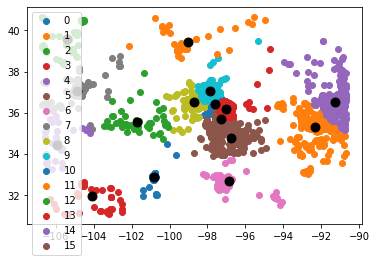

In [ ]:
#get center of cluster
centroids = kmeans.cluster_centers_

#show scatter plot of cluster
for i in u_labels:
    plt.scatter(new_df.iloc[label == i , 0] , new_df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')    
plt.legend()
plt.show()

**Q:2 Perform regression analysis using least squares method for seismic data (Mag. Vs. Time).Show that by splitting the time interval range, R2 can be improved**

In [ ]:

#select value from 2010 to 2015
mask = (df_quakes['time'] > '2010') & (df_quakes['time'] <= '2015')
df = df_quakes.loc[mask]
df

,time,latitude,longitude,depth,mag,magType,net,place,type,status,locationSource,magSource
1137,2010-01-01T18:45:51.600Z,35.635000,-97.185000,5.00,2.80,6,2,3097,0,0,22,19
1138,2010-01-11T05:16:00.070Z,35.539000,-97.259000,5.00,2.80,6,2,3097,0,0,22,19
1139,2010-01-14T10:05:34.150Z,35.539000,-97.238000,5.00,3.30,6,2,3097,0,0,22,19
1140,2010-01-15T15:18:26.350Z,35.576000,-97.250000,8.00,3.80,12,2,3097,0,0,22,19
1141,2010-01-15T15:27:02.320Z,35.555000,-97.249000,8.00,3.70,12,2,3097,0,0,22,19
...,...,...,...,...,...,...,...,...,...,...,...,...
7049,2014-12-31T17:49:39.190Z,37.200333,-97.894833,6.62,1.62,8,0,3091,0,0,5,8
7050,2014-12-31T18:31:39.990Z,32.947300,-100.840100,5.00,3.20,5,2,1811,0,0,22,19
7051,2014-12-31T21:54:53.760Z,37.200333,-97.893667,6.69,2.08,8,0,3091,0,0,5,8
7052,2014-12-31T22:03:51.600Z,37.199167,-97.893167,6.67,2.38,8,0,3091,0,0,5,8


In [ ]:
linear_re_data = df[['time', 'mag']]
linear_re_data['Time'] = np.arange(len(df.index))

linear_re_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,mag,Time
1137,2010-01-01T18:45:51.600Z,2.80,0
1138,2010-01-11T05:16:00.070Z,2.80,1
1139,2010-01-14T10:05:34.150Z,3.30,2
1140,2010-01-15T15:18:26.350Z,3.80,3
1141,2010-01-15T15:27:02.320Z,3.70,4
...,...,...,...
7049,2014-12-31T17:49:39.190Z,1.62,5912
7050,2014-12-31T18:31:39.990Z,3.20,5913
7051,2014-12-31T21:54:53.760Z,2.08,5914
7052,2014-12-31T22:03:51.600Z,2.38,5915


In [ ]:

X = linear_re_data.loc[:,['Time']]  # features
y = linear_re_data.loc[:,['mag']]  # target
#call object of linear regression model
model = LinearRegression()

#train model of liner regression
model.fit(X, y)
y_pre=model.predict(X)
y_pre
cross_val_score(model, X, y, cv=10, scoring="r2").mean()


-0.17863891013607985

In [ ]:


#NOW SPLIT DATA TO IMPROVE R^2
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model.fit(xtrain, ytrain)
print('new r^2 value')
cross_val_score(model, xtest, ytest, cv=10, scoring="r2").mean()


new r^2 value


0.04092274384303822

Q1 Perform clutering on injection well data set

In [ ]:
#load injectio well data set
df_well = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/InjectionWells.csv')
for_anova=df_well
df_well.head()


,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,...,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,133856.0,9/6/1977,ALFALFA,13,...,10W,C-SE SE,36.900324,-98.21826,"2,500",300,CHEROKEE,NaN,NaN,NaN
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,470258.0,11/27/2002,ALFALFA,21,...,09W,C-NW NW,36.896636,-98.17772,"2,400","1,000",RED FORK,NaN,NaN,NaN
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,329426.0,8/19/1988,ALFALFA,24,...,11W,SE NE,36.806113,-98.32584,"1,050","1,000",RED FORK,NaN,NaN,NaN
3,3.500321e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2R,VELMA,2-19,281652.0,7/11/1985,ALFALFA,19,...,10W,SW NE NE SW,36.888589,-98.31853,"3,152","1,000",RED FORK,NaN,NaN,NaN
4,3.500321e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,GRAY,1A,470257.0,11/27/2002,ALFALFA,20,...,09W,SE SW NW,36.892128,-98.19462,"1,000","2,400",RED FORK,NaN,NaN,NaN


In [ ]:
#convert categorical data to numaric
df_well['WellType']= df_well['WellType'].astype('category').cat.codes
df_well['WellName']= df_well['WellName'].astype('category').cat.codes
df_well['WellNumber']= df_well['WellNumber'].astype('category').cat.codes
df_well['County']= df_well['County'].astype('category').cat.codes
df_well['Twp']= df_well['Twp'].astype('category').cat.codes
df_well['Rng']= df_well['Rng'].astype('category').cat.codes
df_well['QQQQ']= df_well['QQQQ'].astype('category').cat.codes
df_well['ZONE']= df_well['ZONE'].astype('category').cat.codes
df_well['Operator']= df_well['Operator'].astype('category').cat.codes
df_well['PSI']= df_well['PSI'].astype('category').cat.codes
df_well['BBLS']= df_well['BBLS'].astype('category').cat.codes


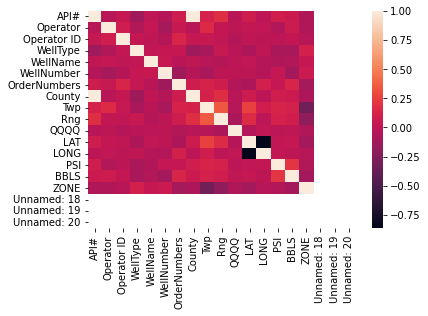

In [ ]:

#check corelation of injection well data
coreltion=df_well.corr()
map=sns.heatmap(coreltion)
plt.show()

In [ ]:

#seprate best colums for clustering
new_df_WELL= df_well[['BBLS','PSI','WellType']]
#drop null values row
new_df_WELL=new_df_WELL.dropna()

#from id no my cluter no is 16
#Initialize the class object
kmeans_well = KMeans(n_clusters= 16)
#making cluter on filtered data
label=kmeans_well.fit_predict(new_df_WELL)

u_labels = np.unique(label)


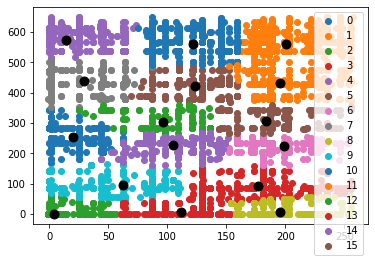

In [ ]:
#get center of cluster
centroids2 = kmeans_well.cluster_centers_
for i in u_labels:
    plt.scatter(new_df_WELL.iloc[label == i , 0] , new_df_WELL.iloc[label == i , 1] , label = i)
plt.scatter(centroids2[:,0] , centroids2[:,1] , s = 80, color = 'k')    
plt.legend()
plt.show()

**Q:3 Perform hypothesis tests on data like chi_square and anova**

In [ ]:
#create contigency tabel

crosstab = pd.crosstab(for_chi.magType,for_chi.magSource )
crosstab.values

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    3,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   12,    0,    0,    0,    3,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   29,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  875,    0],
       [   0,    0,    0,    0,    0,   17,    2,    0,    0,    0,    0,
           0,    0,    7,    3,    0,    0,    0,  122,  424,    0],
       [   3,    0,    0,    0,    3,    1,    0,    0,    0,    0,    0,
           0, 2328,    0,    1,   22,    1,    1,  235,    2,    0],

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
#calculte degree of freedom
stat, p, dof, expected = chi2_contingency(crosstab.values)
print('dof=%d' % dof)
print(expected)


dof=240
[[6.45948468e-04 4.30632312e-04 2.15316156e-04 4.30632312e-04
  2.58379387e-03 6.89011699e-03 4.30632312e-04 2.15316156e-04
  5.00394746e-01 2.15316156e-04 6.45948468e-04 2.15316156e-04
  5.36783177e-01 2.58379387e-03 3.44505849e-02 4.73695543e-03
  2.15316156e-04 2.15316156e-04 1.40084691e+00 5.02763224e-01
  4.09100696e-03]
 [3.22974234e-03 2.15316156e-03 1.07658078e-03 2.15316156e-03
  1.29189694e-02 3.44505849e-02 2.15316156e-03 1.07658078e-03
  2.50197373e+00 1.07658078e-03 3.22974234e-03 1.07658078e-03
  2.68391588e+00 1.29189694e-02 1.72252925e-01 2.36847771e-02
  1.07658078e-03 1.07658078e-03 7.00423455e+00 2.51381612e+00
  2.04550348e-02]
 [6.24416852e-03 4.16277901e-03 2.08138951e-03 4.16277901e-03
  2.49766741e-02 6.66044642e-02 4.16277901e-03 2.08138951e-03
  4.83714921e+00 2.08138951e-03 6.24416852e-03 2.08138951e-03
  5.18890404e+00 2.49766741e-02 3.33022321e-01 4.57905692e-02
  2.08138951e-03 2.08138951e-03 1.35415201e+01 4.86004450e+00
  3.95464006e-02]
 [2.1531

In [ ]:
# interpret test-statistic
prob = 0.95
#calculte criticl value to reject or accept data
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject magType)')
else:
	print('Independent (fail to reject magType)')


probability=0.950, critical=277.138, stat=53274.274
Dependent (reject magType)


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two way anova on given data 

model_anova = ols('PSI~WellType+Rng+County+Twp', data=df_well).fit()
anova=sm.stats.anova_lm(model_anova, type=2)
print(anova)



               df        sum_sq       mean_sq           F        PR(>F)
WellType      1.0  3.488996e+06  3.488996e+06   72.810878  1.611867e-17
Rng           1.0  7.646188e+06  7.646188e+06  159.566137  2.498920e-36
County        1.0  2.222856e+06  2.222856e+06   46.388161  1.020039e-11
Twp           1.0  3.869214e+06  3.869214e+06   80.745529  2.981253e-19
Residual  11121.0  5.329029e+08  4.791861e+04         NaN           NaN


In [ ]:
#check the column is accepted or not
if(anova.iloc[0,4]>0.05):
  print("well type is accepted")
else:
  print("well type is rejected")
if(anova.iloc[1,4]>0.05):
  print("Rng is accepted")
else:
  print("Rng is rejected")
if(anova.iloc[2,4]>0.05):
  print("County is accepted")
else:
  print("County is rejected")
if(anova.iloc[3,4]>0.05):
  print("Twp is accepted")
else:
  print("Twp is rejected")

well type is rejected
Rng is rejected
County is rejected
Twp is rejected
